# **CAMP Dataset Analysis of Hemoglobin Levels and Lung Function Improvement**

---



This dataset analysis aims to determine if there is a significant correlation between hemoglobin levels and lung function change in response to bronchodilator administration (FEV1/FVC). By understanding this correlation, we can evaluate how anemia impacts therapeutic treatment for asthmatic patients. 

Objectives: 


1.   Establish the context of the patients as receiving treatment of asthma, determine whether pulmonary function changes with bronchodilators
2.   Determine if anemic patients have a different response to bronchodilators compared to non-anemic patients, exploring whether anemia hinders treatment for asthma 
3.   Assess the correlation between hemoglobin level of a patient and their response to bronchodilators, determine whether better hemoglobin levels equate to better therapeutic response 



Firstly, needed libraries are imported. The raw dataset from CAMP is imported. Then with the selected variables for the analysis, the dataframe is cleaned of non-numerical values and outliers. 

In [43]:
# Import necessary libraries 
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

The dataset from CAMP is uploaded. 

In [44]:
# Import original dataframe 
df=pd.read_csv('https://drive.google.com/uc?export=download&id=1hkaJ1v7uL29xuof7sNiqzluOPjy6Y1en')
df

,TX,TG,id,age_rz,GENDER,ETHNIC,hemog,PREFEV,PREFVC,PREFF,...,POSFVCPP,wbc,agehome,anypet,woodstove,dehumid,parent_smokes,any_smokes,visitc,fdays
0,ned,B,1,5,m,o,12.5,1.38,1.75,79.0,...,95.0,65.0,50.0,1.0,2.0,2.0,1.0,1.0,0,0
1,ned,B,1,5,m,o,NaN,1.31,1.70,77.0,...,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,68
2,ned,B,1,5,m,o,NaN,1.44,1.76,82.0,...,89.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,175
3,ned,B,1,5,m,o,NaN,1.48,1.76,84.0,...,83.0,NaN,25.0,1.0,2.0,2.0,1.0,1.0,12,370
4,ned,B,1,5,m,o,NaN,1.44,1.79,80.0,...,91.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9942,pned,C,1041,6,f,w,NaN,2.10,2.35,89.0,...,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40,1256
9943,pned,C,1041,6,f,w,13.4,1.99,2.33,85.0,...,95.0,42.0,40.0,1.0,2.0,2.0,2.0,2.0,48,1486
9944,pned,C,1041,6,f,w,NaN,2.83,3.05,93.0,...,103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72,2270
9945,pned,C,1041,6,f,w,NaN,3.03,3.22,94.0,...,110.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96,3005


In [45]:
# Save the original dataset 
df.to_csv('CAMP.csv')

# Data Selection and Cleaning 

To select the appropriate sample population for analysis, variables of interest are pulled and exclusion criterias are applied. The placebo treatment groups are removed for apprioprate analysis of treated individuals. Additionally, measurements from the inital randomization day are excluded. From the selected for the columns of interest, the Dataframe must be cleaned of NaN values. 

In [46]:
# Select the columns of interest to a new Dataframe 
colInterest=['TX','id','age_rz','GENDER' ,'fdays','hemog','PREFF', 'POSFF']
df[colInterest]

,TX,id,age_rz,GENDER,fdays,hemog,PREFF,POSFF
0,ned,1,5,m,0,12.5,79.0,84.0
1,ned,1,5,m,68,NaN,77.0,81.0
2,ned,1,5,m,175,NaN,82.0,86.0
3,ned,1,5,m,370,NaN,84.0,88.0
4,ned,1,5,m,455,NaN,80.0,85.0
...,...,...,...,...,...,...,...,...
9942,pned,1041,6,f,1256,NaN,89.0,92.0
9943,pned,1041,6,f,1486,13.4,85.0,88.0
9944,pned,1041,6,f,2270,NaN,93.0,98.0
9945,pned,1041,6,f,3005,NaN,94.0,96.0


In [47]:
# Clean the Dataframe of any NaN values, dropping any rows that contain NaN values 
df_col = df[colInterest].dropna(how='any')
df_col

,TX,id,age_rz,GENDER,fdays,hemog,PREFF,POSFF
0,ned,1,5,m,0,12.5,79.0,84.0
9,ned,1,5,m,1462,13.4,78.0,83.0
15,ned,2,11,m,0,12.5,71.0,82.0
24,ned,2,11,m,1408,12.5,64.0,75.0
31,ned,4,7,f,0,13.6,87.0,95.0
...,...,...,...,...,...,...,...,...
9919,pbud,1039,8,f,1418,11.9,76.0,84.0
9925,bud,1040,10,f,0,13.6,86.0,88.0
9934,bud,1040,10,f,1454,14.6,81.0,84.0
9940,pned,1041,6,f,0,13.6,84.0,89.0


In [48]:
# Select out the placebo groups, having only the treatmeant groups nedocromil and budesonide 
df_treated = df_col.loc[ (df_col['TX'] == 'ned') | (df_col['TX'] == 'bud') ]
df_treated

,TX,id,age_rz,GENDER,fdays,hemog,PREFF,POSFF
0,ned,1,5,m,0,12.5,79.0,84.0
9,ned,1,5,m,1462,13.4,78.0,83.0
15,ned,2,11,m,0,12.5,71.0,82.0
24,ned,2,11,m,1408,12.5,64.0,75.0
31,ned,4,7,f,0,13.6,87.0,95.0
...,...,...,...,...,...,...,...,...
9852,ned,1035,10,m,1450,13.6,81.0,87.0
9860,ned,1036,5,f,0,12.9,85.0,89.0
9869,ned,1036,5,f,1493,14.4,85.0,89.0
9925,bud,1040,10,f,0,13.6,86.0,88.0


In [49]:
# Select measurements taken during the third session of treatment
# Removing measurements taken during day 0 randomization 
df_follow = df_treated.loc[ (df_treated['fdays'] != 0)]
df_follow

,TX,id,age_rz,GENDER,fdays,hemog,PREFF,POSFF
9,ned,1,5,m,1462,13.4,78.0,83.0
24,ned,2,11,m,1408,12.5,64.0,75.0
54,ned,5,5,m,1427,15.6,71.0,82.0
81,bud,9,12,f,1421,12.1,73.0,80.0
144,ned,14,5,f,1459,13.1,84.0,88.0
...,...,...,...,...,...,...,...,...
9824,bud,1030,7,m,1504,15.0,81.0,84.0
9836,ned,1033,11,f,1441,13.5,90.0,92.0
9852,ned,1035,10,m,1450,13.6,81.0,87.0
9869,ned,1036,5,f,1493,14.4,85.0,89.0


In [50]:
# Create a new column to visualize the difference of lung function before and after bronchodilator administration
# Difference between pre and post FEV1/FVC ratio as dFF 
df_follow['dFF'] = df_follow['POSFF'] - df_follow['PREFF']
df_follow

<ipython-input-50-7eb343d75837>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_follow['dFF'] = df_follow['POSFF'] - df_follow['PREFF']


,TX,id,age_rz,GENDER,fdays,hemog,PREFF,POSFF,dFF
9,ned,1,5,m,1462,13.4,78.0,83.0,5.0
24,ned,2,11,m,1408,12.5,64.0,75.0,11.0
54,ned,5,5,m,1427,15.6,71.0,82.0,11.0
81,bud,9,12,f,1421,12.1,73.0,80.0,7.0
144,ned,14,5,f,1459,13.1,84.0,88.0,4.0
...,...,...,...,...,...,...,...,...,...
9824,bud,1030,7,m,1504,15.0,81.0,84.0,3.0
9836,ned,1033,11,f,1441,13.5,90.0,92.0,2.0
9852,ned,1035,10,m,1450,13.6,81.0,87.0,6.0
9869,ned,1036,5,f,1493,14.4,85.0,89.0,4.0


## Data Outlier Removal

Outliers of hemoglobin levels are removed. 

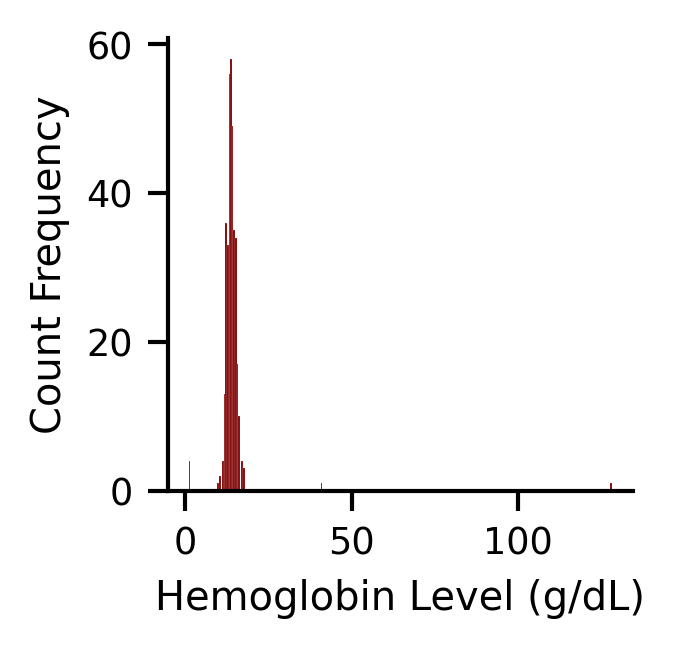

In [51]:
# Plot histogram to visualize outliers of hemoglobin levels 
plt.figure (figsize = (2,2), dpi = 300)
sns.set_context('paper')
sns.histplot(data=df_follow, x = 'hemog', facecolor='maroon', edgecolor='white', palette = 'colorbind')
sns.despine()
plt.xlabel('Hemoglobin Level (g/dL)')
plt.ylabel('Count Frequency')
plt.savefig("histplot_raw_hemog.pdf",bbox_inches='tight')
plt.savefig('histplot_raw_hemog.png',bbox_inches='tight')

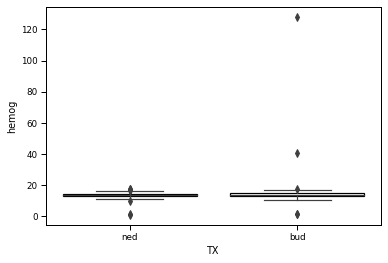

In [52]:
# Plot to visualize outliers of hemoglobin levels based on treatment group 
sns.boxplot(data=df_follow, x = 'TX', y = 'hemog', boxprops= {'edgecolor':'black','facecolor':(1,1,1,0)}, zorder = 5)

To calculate how many standard deviations every value of hemoglobin level is from the sample mean, the average hemoglobin levels, with standard deviation, is calculated. 

In [53]:
mean = df_follow['hemog'].mean()
mean

14.134903047091415

In [54]:
std = df_follow['hemog'].std()
std

6.430788059018775

In [55]:
# Create a column to store the standard deviation of each value 
df_follow['stdFromMean'] = (df_follow['hemog'] - mean) /std
df_follow

<ipython-input-55-0470e633d746>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_follow['stdFromMean'] = (df_follow['hemog'] - mean) /std


,TX,id,age_rz,GENDER,fdays,hemog,PREFF,POSFF,dFF,stdFromMean
9,ned,1,5,m,1462,13.4,78.0,83.0,5.0,-0.114279
24,ned,2,11,m,1408,12.5,64.0,75.0,11.0,-0.254231
54,ned,5,5,m,1427,15.6,71.0,82.0,11.0,0.227825
81,bud,9,12,f,1421,12.1,73.0,80.0,7.0,-0.316431
144,ned,14,5,f,1459,13.1,84.0,88.0,4.0,-0.160929
...,...,...,...,...,...,...,...,...,...,...
9824,bud,1030,7,m,1504,15.0,81.0,84.0,3.0,0.134524
9836,ned,1033,11,f,1441,13.5,90.0,92.0,2.0,-0.098729
9852,ned,1035,10,m,1450,13.6,81.0,87.0,6.0,-0.083178
9869,ned,1036,5,f,1493,14.4,85.0,89.0,4.0,0.041223


In [56]:
# Outliers are defined as greater than 3 standard deivations away from the mean 
stdOutliers = df_follow.loc[(df_follow['stdFromMean'] < -3) | (df_follow['stdFromMean'] > 3)]
stdOutliers

,TX,id,age_rz,GENDER,fdays,hemog,PREFF,POSFF,dFF,stdFromMean
1296,bud,144,10,f,1438,41.0,65.0,73.0,8.0,4.177575
9649,bud,1016,10,f,1459,128.0,76.0,83.0,7.0,17.706243


In [57]:
# The Dataset without the outliers of the hemoglobin level data are named into a cleaned Dataframe 
df_cleaned = df_follow.drop(stdOutliers.index)
df_cleaned

,TX,id,age_rz,GENDER,fdays,hemog,PREFF,POSFF,dFF,stdFromMean
9,ned,1,5,m,1462,13.4,78.0,83.0,5.0,-0.114279
24,ned,2,11,m,1408,12.5,64.0,75.0,11.0,-0.254231
54,ned,5,5,m,1427,15.6,71.0,82.0,11.0,0.227825
81,bud,9,12,f,1421,12.1,73.0,80.0,7.0,-0.316431
144,ned,14,5,f,1459,13.1,84.0,88.0,4.0,-0.160929
...,...,...,...,...,...,...,...,...,...,...
9824,bud,1030,7,m,1504,15.0,81.0,84.0,3.0,0.134524
9836,ned,1033,11,f,1441,13.5,90.0,92.0,2.0,-0.098729
9852,ned,1035,10,m,1450,13.6,81.0,87.0,6.0,-0.083178
9869,ned,1036,5,f,1493,14.4,85.0,89.0,4.0,0.041223


In [58]:
# Save the working dataframe
df_cleaned.to_csv('Hemogloblin_FF.csv')

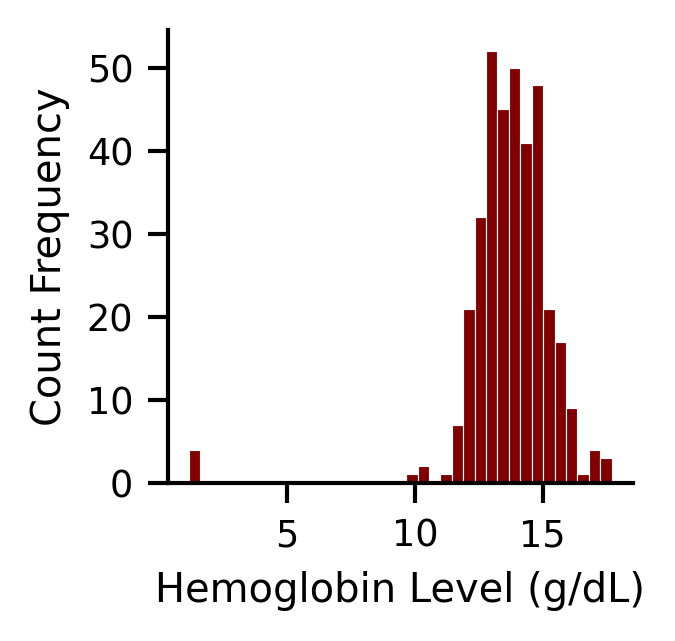

In [59]:
# Plot to visualize the histogram after the removal of outliers 
plt.figure (figsize = (2,2), dpi = 300)
sns.histplot(data=df_cleaned, x = 'hemog',facecolor='maroon', edgecolor='white', palette = 'colorbind')
sns.set_context('paper')
sns.despine()
plt.xlabel('Hemoglobin Level (g/dL)')
plt.ylabel('Count Frequency')
plt.savefig('histplot_hemog_cleaned.png',bbox_inches='tight')
plt.savefig("histplot_hemog_cleaned.pdf",bbox_inches='tight')

# Study Demographic Analysis 

Treatment groups are separated to determine the demographic of the sample population (average gender, age, hemoglobin levels, and other variables). 

In [60]:
# Group those that received nedocromil as treatment 
df_ned = df_cleaned.loc[ (df_cleaned['TX'] == 'ned')]
df_ned
# The row number indicates sample size 

,TX,id,age_rz,GENDER,fdays,hemog,PREFF,POSFF,dFF,stdFromMean
9,ned,1,5,m,1462,13.4,78.0,83.0,5.0,-0.114279
24,ned,2,11,m,1408,12.5,64.0,75.0,11.0,-0.254231
54,ned,5,5,m,1427,15.6,71.0,82.0,11.0,0.227825
144,ned,14,5,f,1459,13.1,84.0,88.0,4.0,-0.160929
229,ned,21,5,m,1459,13.1,79.0,84.0,5.0,-0.160929
...,...,...,...,...,...,...,...,...,...,...
9546,ned,1004,12,f,1463,12.3,80.0,84.0,4.0,-0.285331
9665,ned,1017,9,m,1405,16.0,69.0,77.0,8.0,0.290026
9836,ned,1033,11,f,1441,13.5,90.0,92.0,2.0,-0.098729
9852,ned,1035,10,m,1450,13.6,81.0,87.0,6.0,-0.083178


In [61]:
# Group those that received budesonide as treatment 
df_bud = df_cleaned.loc[ (df_cleaned['TX'] == 'bud')]
df_bud
# The row number indicates sample size 

,TX,id,age_rz,GENDER,fdays,hemog,PREFF,POSFF,dFF,stdFromMean
81,bud,9,12,f,1421,12.1,73.0,80.0,7.0,-0.316431
158,bud,16,11,m,1465,14.1,74.0,80.0,6.0,-0.005427
377,bud,38,8,m,1502,14.5,73.0,79.0,6.0,0.056773
482,bud,49,11,m,1493,13.7,82.0,88.0,6.0,-0.067628
556,bud,60,11,f,1461,17.7,61.0,67.0,6.0,0.554379
...,...,...,...,...,...,...,...,...,...,...
9782,bud,1026,5,f,1463,14.1,82.0,85.0,3.0,-0.005427
9798,bud,1028,11,f,1436,15.2,68.0,79.0,11.0,0.165625
9810,bud,1029,6,f,1447,11.5,77.0,81.0,4.0,-0.409733
9824,bud,1030,7,m,1504,15.0,81.0,84.0,3.0,0.134524


The mean age with standard deviation of both treatment group are determined. 

In [62]:
# Mean age of nedocromil treatment group 
df_ned['age_rz'].mean()

8.173410404624278

In [63]:
# Standard deviation of nedocromil treatment group 
df_ned['age_rz'].std()

2.141502526022531

In [64]:
# Mean age of budesonide treatment group
df_bud['age_rz'].mean()

8.494623655913978

In [65]:
# Standard deviation of budesonide treatment group 
df_bud['age_rz'].std()

2.1110963254757875

The number of females and males are determined for both treatment groups. 

In [66]:
# Number of females in nedocromil group 
female_ned = df_ned.loc[ (df_ned['GENDER'] =='f') ]
female_N = len(female_ned)
female_N

56

In [67]:
# Number of males in nedocromil group 
male_N = (len(df_ned) - female_N)
male_N

117

In [68]:
# Number of females in budesonide group 
female_bud = df_bud.loc[ (df_bud['GENDER'] =='f') ]
female_B = len(female_bud)
female_B

76

In [69]:
# Number of males in budesonide group
male_B = ( len(df_bud) - female_N)
male_B

130

The average and standard deviation of hemoglobin levels are calculated for both nedocromil and budesonide treatment groups. 

In [70]:
# Average hemoglobin level in nedocromil group
df_ned['hemog'].mean()

13.701271676300577

In [71]:
# Standard deviation hemoglobin level in nedocromil group 
df_ned['hemog'].std()

1.8283826889243455

In [72]:
# Average hemoglobin level in budesonide group 
df_bud['hemog'].mean()

13.781612903225808

In [73]:
# Standard deviation hemoglobin level in budesonide group  
df_bud['hemog'].std()

1.7554242054950742

The average difference between FEV1/FVC before and after administration of bronchodilator in nedocromil and budesonide treatment groups are determined. 

In [74]:
# Average change in FEV1/FVC in nedocromil group 
df_ned['dFF'].mean()

5.6473988439306355

In [75]:
# Standard deviation of change in FEV1/FVC in nedocromil group 
df_ned['dFF'].std()

3.5678566048524645

In [76]:
# Average change in FEV1/FVC in budesonide group
df_bud['dFF'].mean()

5.349462365591398

In [77]:
# Standard deviation of change in FEV1/FVC in budesonide group 
df_bud['dFF'].std()

3.6836269921769924

# Data Visualization

As an initial screening of variable correlation, a heat map is constructed. This figure allows visualize indication of any significant correlations in the dataset. 

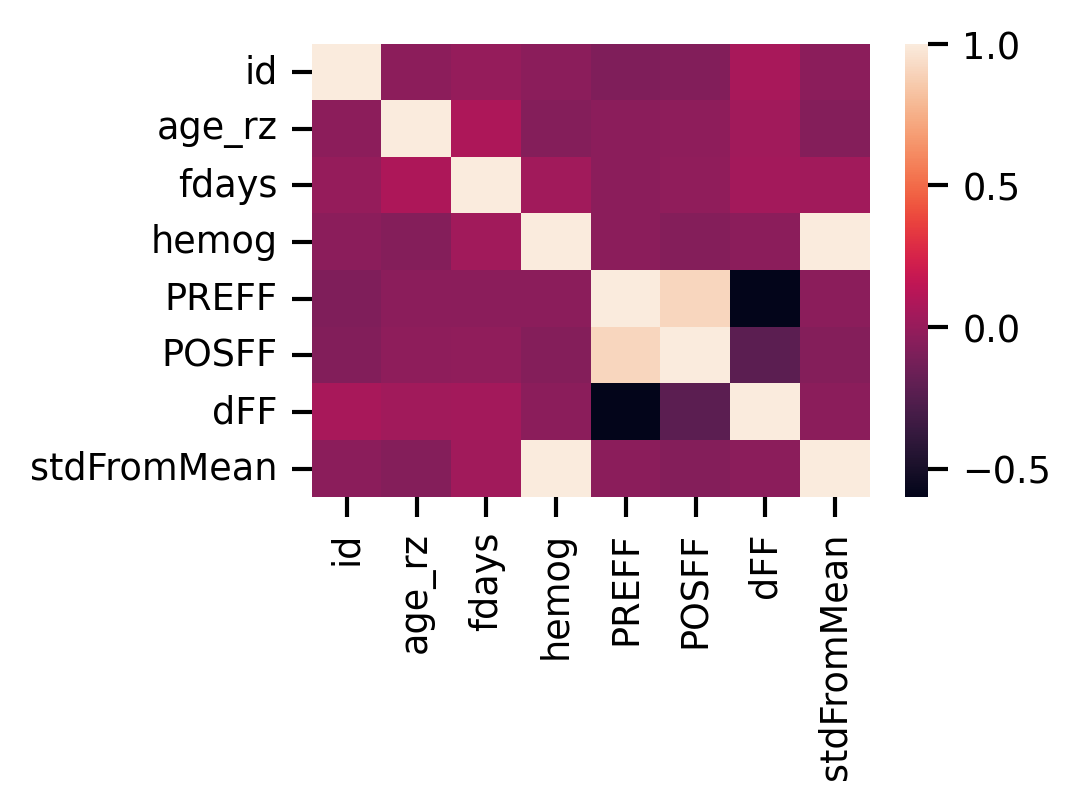

In [78]:
# Construct a correlation heat map 
corr_matrix = df_cleaned.corr()
round(corr_matrix,2)
plt.figure (figsize = (3,2), dpi = 300)
sns.set_context('paper')
sns.heatmap(corr_matrix)
plt.savefig('heatmap_variables.pdf',bbox_inches='tight')
plt.savefig('heatmap_variables.png',bbox_inches='tight')

To visualize the distribution for statistical analysis, a histogram of the FEV1/FVC before and after bronchodilator administration is created. 

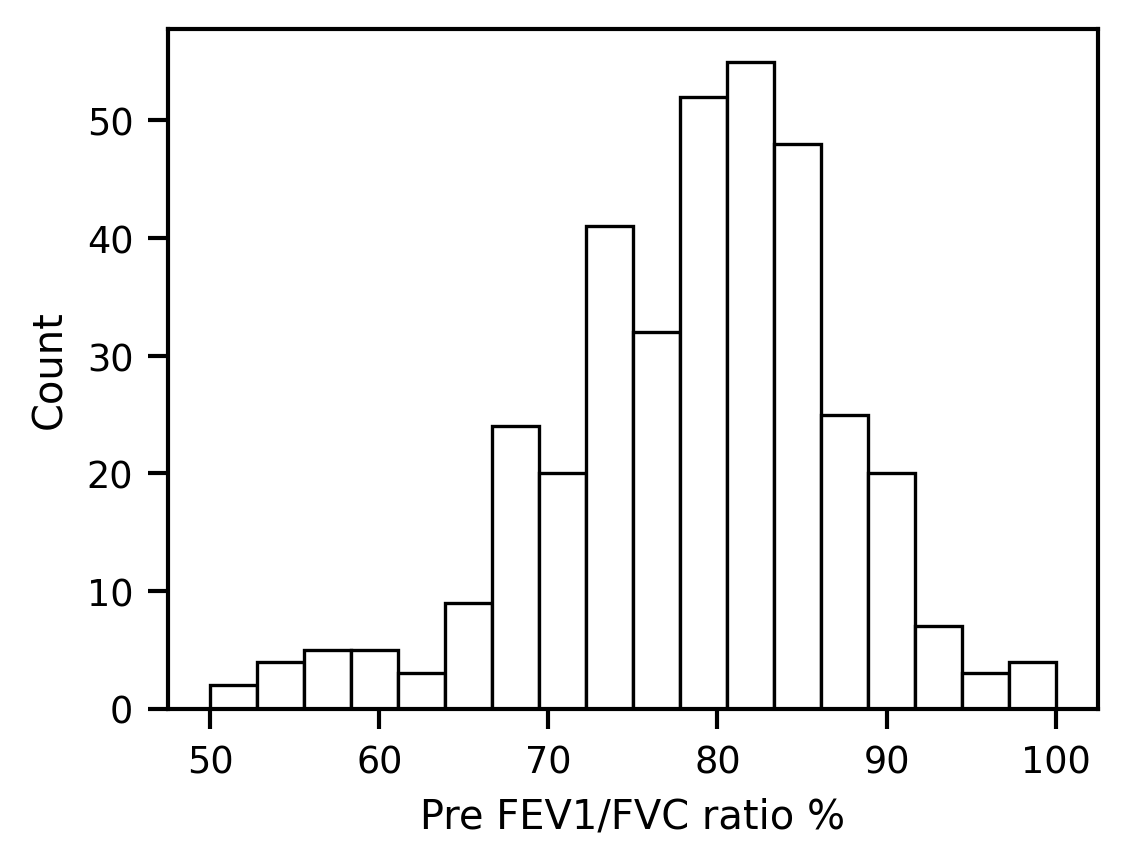

In [79]:
plt.figure (figsize = (4,3), dpi = 300)
sns.set_context('paper')
sns.histplot(data = df_cleaned, x = 'PREFF', facecolor='white',  edgecolor='black' )
plt.xlabel('Frequency Count')
plt.xlabel("Pre FEV1/FVC ratio %")
plt.savefig('histo_PREFF.pdf',bbox_inches='tight')
plt.savefig('histo_PREFF.png',bbox_inches='tight')

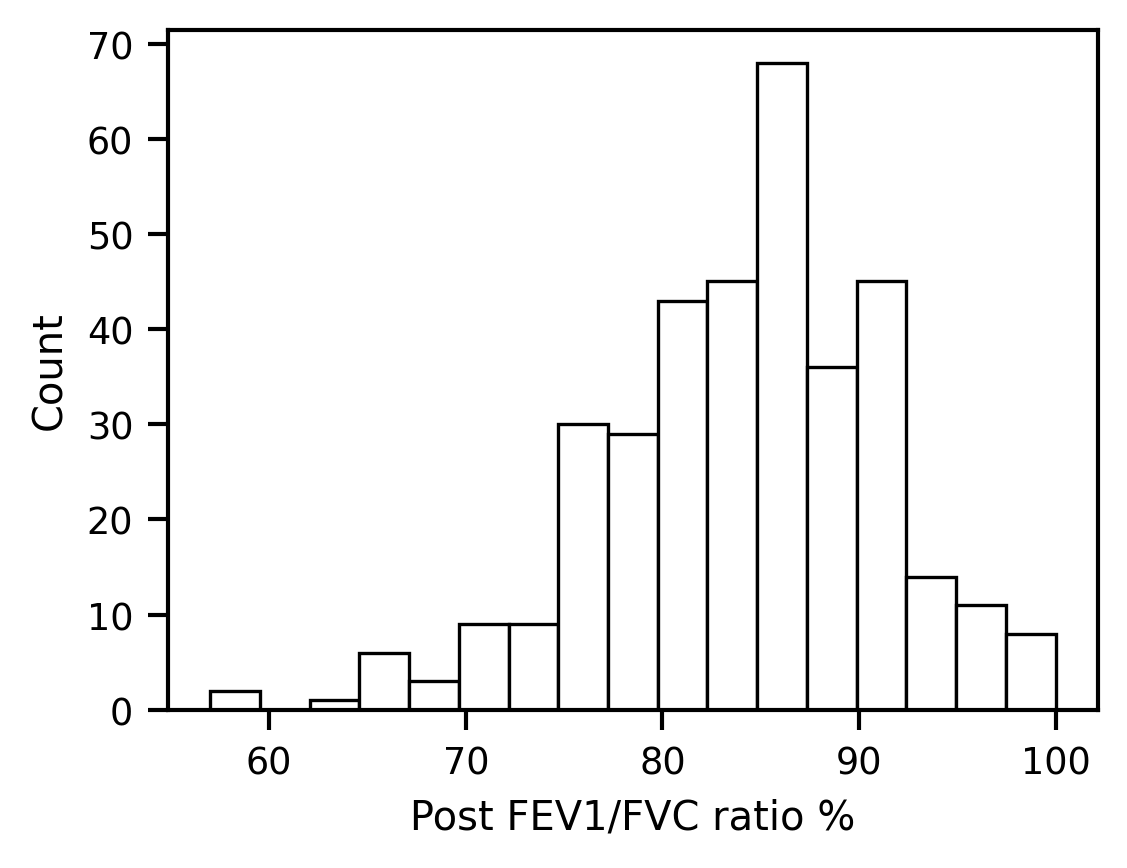

In [80]:
plt.figure (figsize = (4,3), dpi = 300)
sns.set_context('paper')
sns.histplot(data = df_cleaned, x = 'POSFF', facecolor='white',  edgecolor='black' )
plt.xlabel('Frequency Count')
plt.xlabel("Post FEV1/FVC ratio %")
plt.savefig('histo_POSTFF.pdf',bbox_inches='tight')
plt.savefig('histo_POSTFF.png',bbox_inches='tight')

To visualize the difference between the FEV1/FVC ratio before and after administration of bronchodilators across treatment groups, a combined box-and-strip plot is made.  



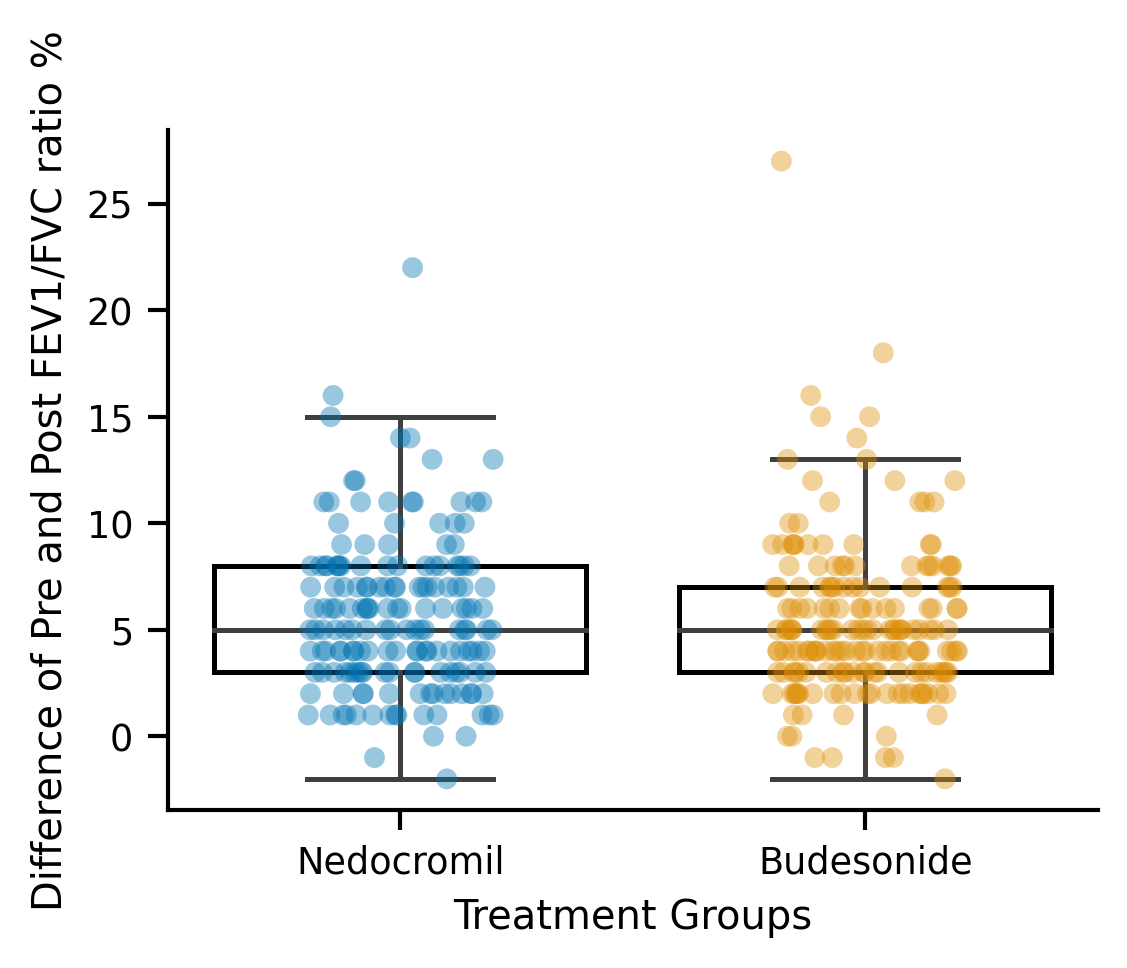

In [81]:
plt.figure (figsize = (4,3), dpi = 300)
sns.set_context('paper')
# Set x axis order for treatment groups 
x_order = ['ned', 'bud']
# Plots
sns.boxplot(data=df_cleaned, x='TX', y='dFF', order=x_order, fliersize = 0, boxprops ={'edgecolor':'black', 'facecolor':(1,1,1,0)})
sns.stripplot(data=df_cleaned, x='TX', y='dFF', order = x_order, jitter = 0.2 ,alpha =0.4, palette = 'colorblind')
sns.despine()
# Change x axis ticks to the full name of the treatments 
x = ['Nedocromil', 'Budesonide']
default_x_ticks = range (len(x))
plt.xticks(default_x_ticks, x)
# Change axis labels 
plt.xlabel('Treatment Groups')
plt.ylabel("Difference of Pre and Post FEV1/FVC ratio %")
plt.savefig('boxdot.pdf',bbox_inches='tight')
plt.savefig('boxdot.png',bbox_inches='tight')

A 

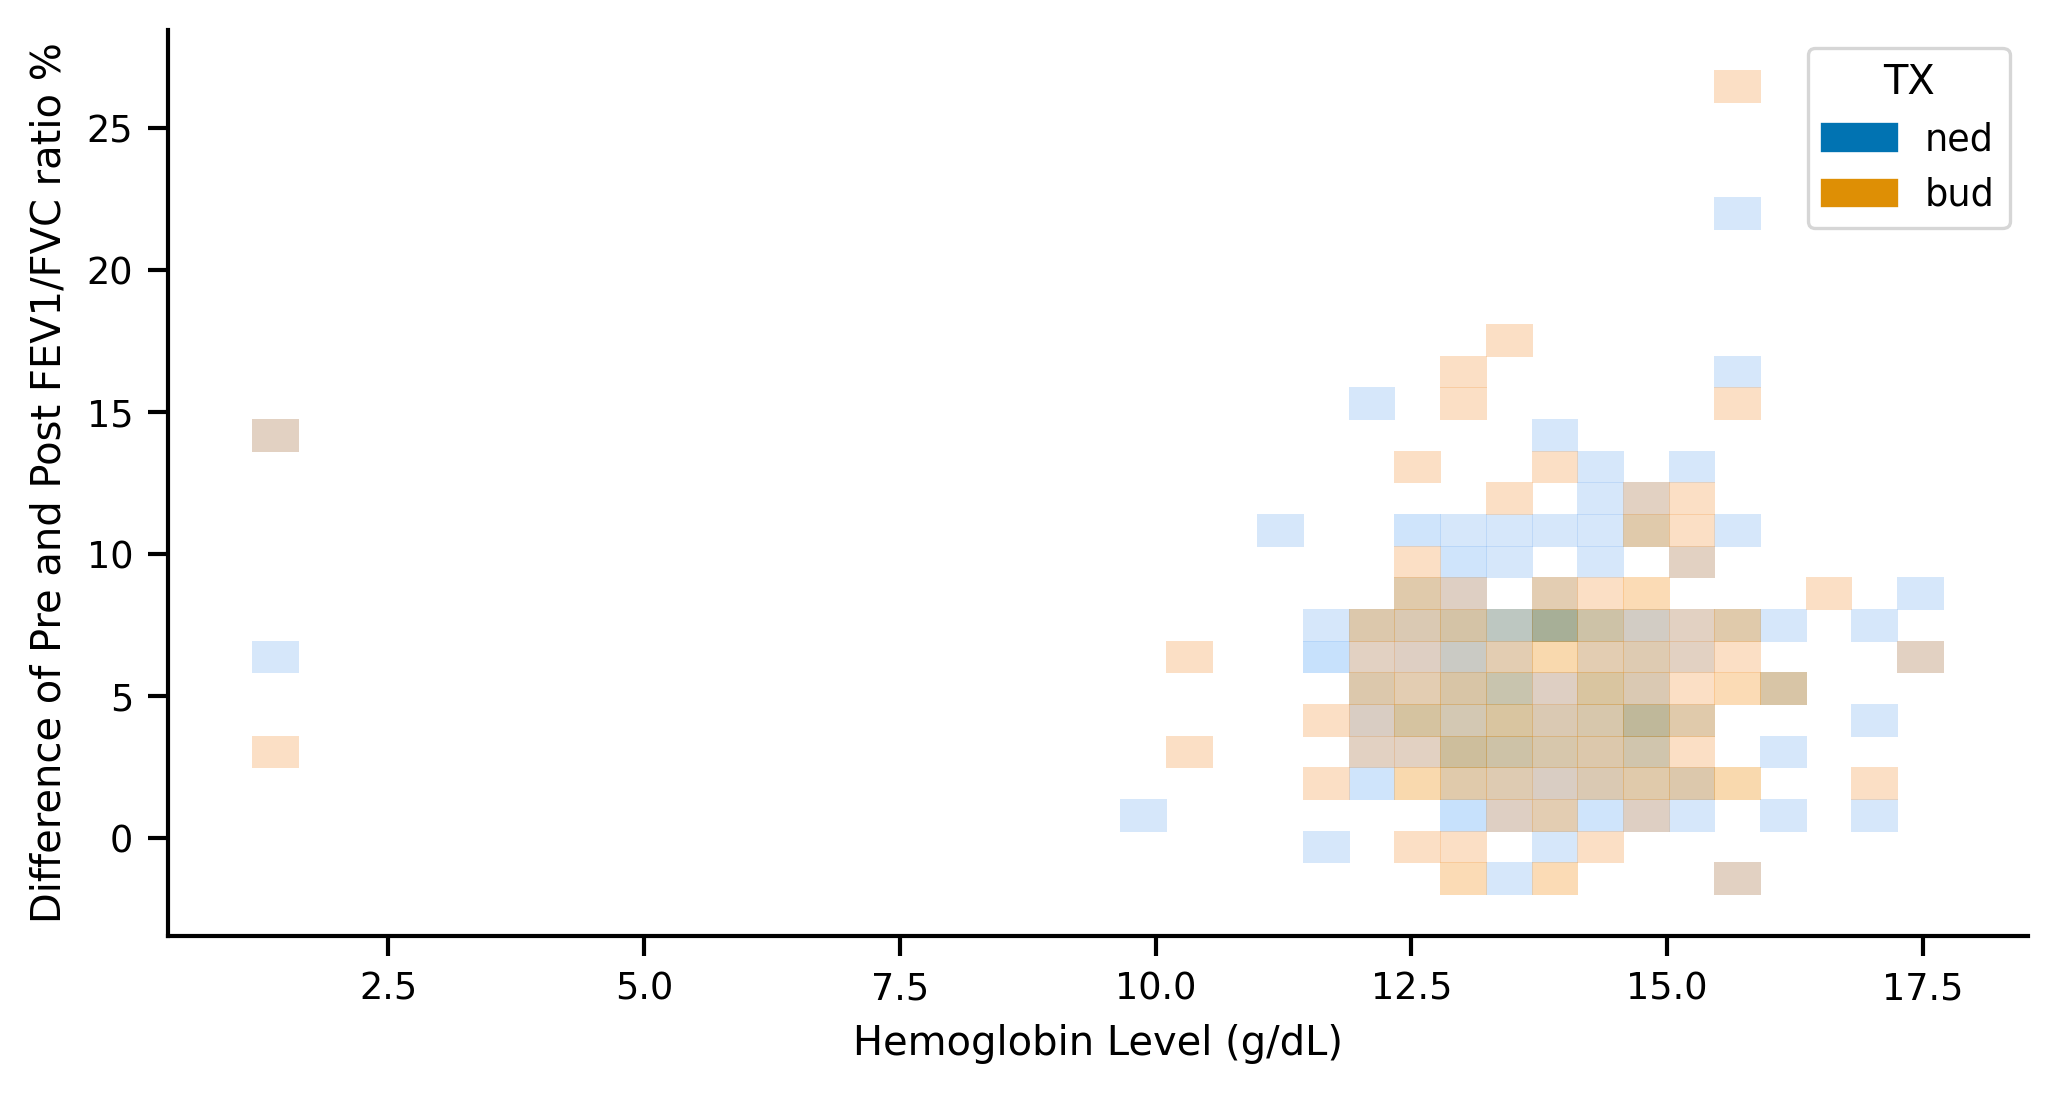

In [82]:
plt.figure (figsize = (8,4), dpi = 300)
sns.set_context('paper')
sns.histplot(data=df_cleaned, x='hemog', y='dFF', hue='TX', alpha =0.4, palette = 'colorblind')
plt.xlabel('Hemoglobin Level (g/dL)')
plt.ylabel("Difference of Pre and Post FEV1/FVC ratio %")
sns.despine()
plt.savefig('histplot_dFF_hemog.pdf',bbox_inches='tight')
plt.savefig('histplot_dFF_hemog.png',bbox_inches='tight')


# Statistical analysis

## Wilcoxon Signed Rank Test 


Statistical Test 1 

The Wilcoxon Signed Rank Test determines if there is signficant improvement in lung function due to bronchodilators based on changes of FEV1/FVC. 

In [83]:
# Normality test of FEV1/FVC before administration of bronchodilator
stats.kstest(df_cleaned['PREFF'], 'norm') 

KstestResult(statistic=1.0, pvalue=0.0)

In [84]:
# Normality test of FEV1/FVC after administration of bronchodilator
stats.kstest(df_cleaned['POSFF'], 'norm') 

KstestResult(statistic=1.0, pvalue=0.0)

In [85]:
# Statistics test: Paired nonparametric samples, Wilcoxon Signed Rank Test
# H0: Md <= 0 
# H1: Md > 0 (one-sided)
stats.wilcoxon(df_cleaned['POSFF'], df_cleaned['PREFF'], alternative = 'greater')

WilcoxonResult(statistic=62690.0, pvalue=1.0682923478724396e-59)

The normality test shows that the two samples are non-parameteric. 
These paired non-parametric samples determines that there is statistically significance improvement in lung function from treatment of bronchodilators (p << 0).  

## Fisher's Exact Test

Statistical Test 2 

A Fisher's Exact Test is used to assess the association between anemic hemoglobin levels and improvement in pulmonary function after administration of bronchodilators. Firstly, variables are converted into binary cateogrical dependent variables of anemic/non-anemic and pulmonary function improvement/no improvement. Then, a contingency table is constructed. Finally, the Fisher's Exact Test is applied. 

In [86]:
# To convert to binary variables, anemic hemoglobin levels are defined as below 12g/dL 
# Anemic patients are represented as 1 
df_cleaned.loc[ df_cleaned['hemog'] < 12 , 'Anemic'] = 1 
df_cleaned

,TX,id,age_rz,GENDER,fdays,hemog,PREFF,POSFF,dFF,stdFromMean,Anemic
9,ned,1,5,m,1462,13.4,78.0,83.0,5.0,-0.114279,NaN
24,ned,2,11,m,1408,12.5,64.0,75.0,11.0,-0.254231,NaN
54,ned,5,5,m,1427,15.6,71.0,82.0,11.0,0.227825,NaN
81,bud,9,12,f,1421,12.1,73.0,80.0,7.0,-0.316431,NaN
144,ned,14,5,f,1459,13.1,84.0,88.0,4.0,-0.160929,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9824,bud,1030,7,m,1504,15.0,81.0,84.0,3.0,0.134524,NaN
9836,ned,1033,11,f,1441,13.5,90.0,92.0,2.0,-0.098729,NaN
9852,ned,1035,10,m,1450,13.6,81.0,87.0,6.0,-0.083178,NaN
9869,ned,1036,5,f,1493,14.4,85.0,89.0,4.0,0.041223,NaN


In [87]:
# To convert to binary variables, non-anemic hemoglobin levels are defined as 12g/dL or higher
# Non-anemic patients are represented as 0 
df_cleaned = df_cleaned.fillna(0)
df_cleaned

,TX,id,age_rz,GENDER,fdays,hemog,PREFF,POSFF,dFF,stdFromMean,Anemic
9,ned,1,5,m,1462,13.4,78.0,83.0,5.0,-0.114279,0.0
24,ned,2,11,m,1408,12.5,64.0,75.0,11.0,-0.254231,0.0
54,ned,5,5,m,1427,15.6,71.0,82.0,11.0,0.227825,0.0
81,bud,9,12,f,1421,12.1,73.0,80.0,7.0,-0.316431,0.0
144,ned,14,5,f,1459,13.1,84.0,88.0,4.0,-0.160929,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9824,bud,1030,7,m,1504,15.0,81.0,84.0,3.0,0.134524,0.0
9836,ned,1033,11,f,1441,13.5,90.0,92.0,2.0,-0.098729,0.0
9852,ned,1035,10,m,1450,13.6,81.0,87.0,6.0,-0.083178,0.0
9869,ned,1036,5,f,1493,14.4,85.0,89.0,4.0,0.041223,0.0


In [88]:
# To convert to binary variables, improvement in pulmonary function is defined as an increase in FEV1/FVC after bronchodilator administration
# Therefore difference in FEV1/FVC is greater than 0
# Improvement in pulmonary function are represented as 1
df_cleaned.loc [df_cleaned['dFF'] > 0, 'Improved'] = 1
df_cleaned

,TX,id,age_rz,GENDER,fdays,hemog,PREFF,POSFF,dFF,stdFromMean,Anemic,Improved
9,ned,1,5,m,1462,13.4,78.0,83.0,5.0,-0.114279,0.0,1.0
24,ned,2,11,m,1408,12.5,64.0,75.0,11.0,-0.254231,0.0,1.0
54,ned,5,5,m,1427,15.6,71.0,82.0,11.0,0.227825,0.0,1.0
81,bud,9,12,f,1421,12.1,73.0,80.0,7.0,-0.316431,0.0,1.0
144,ned,14,5,f,1459,13.1,84.0,88.0,4.0,-0.160929,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9824,bud,1030,7,m,1504,15.0,81.0,84.0,3.0,0.134524,0.0,1.0
9836,ned,1033,11,f,1441,13.5,90.0,92.0,2.0,-0.098729,0.0,1.0
9852,ned,1035,10,m,1450,13.6,81.0,87.0,6.0,-0.083178,0.0,1.0
9869,ned,1036,5,f,1493,14.4,85.0,89.0,4.0,0.041223,0.0,1.0


In [89]:
# To convert to binary variables, no improvement or worsening of pulmonary function is defined as an no change to decrease in FEV1/FVC after bronchodilator administration
# Therefore difference in FEV1/FVC is less than or equal to 0
# Improvement in pulmonary function are represented as 0
df_cleaned = df_cleaned.fillna(0)
df_cleaned

,TX,id,age_rz,GENDER,fdays,hemog,PREFF,POSFF,dFF,stdFromMean,Anemic,Improved
9,ned,1,5,m,1462,13.4,78.0,83.0,5.0,-0.114279,0.0,1.0
24,ned,2,11,m,1408,12.5,64.0,75.0,11.0,-0.254231,0.0,1.0
54,ned,5,5,m,1427,15.6,71.0,82.0,11.0,0.227825,0.0,1.0
81,bud,9,12,f,1421,12.1,73.0,80.0,7.0,-0.316431,0.0,1.0
144,ned,14,5,f,1459,13.1,84.0,88.0,4.0,-0.160929,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
9824,bud,1030,7,m,1504,15.0,81.0,84.0,3.0,0.134524,0.0,1.0
9836,ned,1033,11,f,1441,13.5,90.0,92.0,2.0,-0.098729,0.0,1.0
9852,ned,1035,10,m,1450,13.6,81.0,87.0,6.0,-0.083178,0.0,1.0
9869,ned,1036,5,f,1493,14.4,85.0,89.0,4.0,0.041223,0.0,1.0


In [90]:
# A contigency table is made from the binary variables 
contigencyTable = pd.crosstab(df_cleaned['Anemic'], df_cleaned['Improved'])
contigencyTable

Improved,0.0,1.0
Anemic,,
0.0,11,332
1.0,1,15


In [91]:
# Save the contigency table 
contigencyTable.to_csv('contigencyTable_Anemic_Improved.csv')

In [92]:
# To determine statistical significance in association, the Fisher's Exact Test is run 
stats.fisher_exact(contigencyTable)

(0.49698795180722893, 0.426427679484604)

Fail to reject the null 

## Spearman Test 

Statistical Test 3

For application of a correlation test on non-parameteric samples, the Spearman Test is used to determine if there is a statistically significant correlation between hemoglobin levels and changes in lung function in response to bronchodilators. 

In [93]:
stats.kstest(df_cleaned['hemog'], 'norm') 

KstestResult(statistic=0.9888579387186629, pvalue=0.0)

In [94]:
stats.kstest(df_cleaned['dFF'], 'norm') 

KstestResult(statistic=0.893684408441793, pvalue=0.0)

In [95]:
# Statistics test: Nonparametric samples, the Spearnman Test 
# H0: p = 0 Are X and Y monotonically related
# H1: p =/ 0 
stats.spearmanr(df_cleaned['hemog'], df_cleaned['dFF'])

SpearmanrResult(correlation=-0.0074340169361639145, pvalue=0.888371431591044)

The data determines that the hemoglobin levels and improvement in lung function are not monotonically related. 

# **Publication on GitHub**

These codes and results are organized into a Github repository. 

In [96]:
%%bash
rm -r sample_data

In [97]:
%%bash
cat > .gitignore
.*
.gitignore

In [98]:
%%bash
git config --global user.email "katrinh@usc.edu"

In [99]:
%%bash
git init

Initialized empty Git repository in /content/.git/


In [100]:
%%bash
ls -a

.
..
boxdot.pdf
boxdot.png
CAMP.csv
.config
contigencyTable_Anemic_Improved.csv
.git
.gitignore
heatmap_variables.pdf
heatmap_variables.png
Hemogloblin_FF.csv
histo_POSTFF.pdf
histo_POSTFF.png
histo_PREFF.pdf
histo_PREFF.png
histplot_dFF_hemog.pdf
histplot_dFF_hemog.png
histplot_hemog_cleaned.pdf
histplot_hemog_cleaned.png
histplot_raw_hemog.pdf
histplot_raw_hemog.png
.ipynb_checkpoints


In [101]:
%%bash
# Set up the subdirectories to organize the repository 
mkdir data
mkdir code
mkdir results 
mkdir figures

In [102]:
%%bash 
cat > README.md
Within each subdirectory are analysis and data structures to evaluate the relationship between hemoglobin levels and pulmonary function by FEV1/FVC. 
Objectives of the study/repository: 
1. Establish the context of the patients as receiving treatment of asthma, determine whether pulmonary function changes with bronchodilators
2. Determine if anemic patients have a different response to bronchodilators compared to non-anemic patients, exploring whether anemia hinders treatment for asthma 
3. Assess the correlation between hemoglobin level of a patient and their response to bronchodilators, determine whether better hemoglobin levels equate to better therapeutic response 

In [104]:
# Set up the data subdirectory 
%%bash 
cd /content/data
cat > README.md
This subdirectory contains datasets of CAMP, with versions used for analysis 
The CAMP.csv is the original dataset from the CAMP study. 
The Hemogloblin_FF.csv is the resulting dataframe after the application of exclusion criterias such as follow-up day and treatment groups. 
Additionally, the dataframe is cleaned of non-numerical values and outliers of hemoglobin levels.  
This dataframe is the working dataframe for all analysis onwards in the study. 
The contigencyTable_Anemic_Improved.csv is the constructed table for correlation analysis of anemia and pulmonary function improvement due to bronchodilators. This csv is used in correlation analysis by the Spearman test. 

In [106]:
# DataFrames are moved into the data subdirectory 
%%bash 
mv CAMP.csv data/CAMP.csv
mv Hemogloblin_FF.csv data/Hemogloblin_FF.csv
mv contigencyTable_Anemic_Improved.csv data/contigencyTable_Anemic_Improved.csv

CAMP.csv
contigencyTable_Anemic_Improved.csv
Hemogloblin_FF.csv
README.md


mv: cannot stat 'CAMP.csv': No such file or directory
mv: cannot stat 'contigencyTable_Anemic_Improved.csv': No such file or directory


In [107]:
# Confirm changes to the data subdirectory 
%%bash
ls data

CAMP.csv
contigencyTable_Anemic_Improved.csv
Hemogloblin_FF.csv
README.md


In [110]:
# Setup the code subdirectory 
%%bash 
cd code
cat > README.md 
This subdirectory contains a file of the google colaboratory notebook code used to analyze the dataset. This manually uploaded through github repository. 

In [111]:
# Confirm changes to the code subdirectory 
%%bash
ls code 

README.md


In [112]:
# Setup the results subdirectory 
%%bash
cd results 
cat > README.md
This subdirectory contains figures reserved to be used in the results section of the paper. 
The boxdot.pdf and .png are visualizations of the differences in FEV1/FVC in response to bronchodilators across different treatment groups. 
The histplot_dFF_hemog.pdf and .png compare the relationship between hemoglobin levels and FEV1/FVC change due to bronchodilators. These serve as visual aids to determine the correlation between these variables. 

In [113]:
# Analysis table is moved into the results subdirectory 
%%bash 
mv boxdot.pdf results/boxdot.pdf 
mv boxdot.png results/boxdot.png 
mv histplot_dFF_hemog.pdf results/histplot_dFF_hemog.pdf
mv histplot_dFF_hemog.png results/histplot_dFF_hemog.png 

boxdot.pdf
boxdot.png
histplot_dFF_hemog.pdf
histplot_dFF_hemog.png
README.md


In [114]:
# Confirm changes to the results subdirectory 
%%bash 
ls results

boxdot.pdf
boxdot.png
histplot_dFF_hemog.pdf
histplot_dFF_hemog.png
README.md


In [115]:
# Stup the firgures subdirectory 
%%bash 
cd figures 
cat > README.md
This subdirectory contains to figures to provide more visualization of the relationship between variables. These figures are included into the methods section of the paper. 
The histplot_raw_hemog.pdf and .png are the histograms of the hemoglobin levels prior to outlier removal. 
As outliers are defined as 3 standard deviations away from the mean, the histplot_hemog_cleaned.pdf and .png are the histograms distribution of hemoglobin levels after outlier removal. 
To determine the significance of bronchodilators in pulmonary function improvement, the data analyzes the FEV1/FVC before and after administration. 
This visualizes the distribution of the samples and aids in determining normality of the samples for statistical analysis. 
The histo_PREFF.pdf and .png is the distribution of the FEV1/FVC before bronchodilators. 
The histo_POSTFF.pdf and .png is the distribution of the FEV1/FVC after bronchodilators. 
The heatmap_variables.pdf and .png serves a prelimiary measurement of correlation among the variables of the analyzed dataset. 

In [116]:
# Figures are moved into the figures subdirectory 
%%bash 
mv histplot_raw_hemog.pdf figures/histplot_raw_hemog.pdf
mv histplot_raw_hemog.png figures/histplot_raw_hemog.png 
mv histplot_hemog_cleaned.pdf figures/histplot_hemog_cleaned.pdf 
mv histplot_hemog_cleaned.png figures/histplot_hemog_cleaned.png 
mv histo_PREFF.pdf figures/histo_PREFF.pdf
mv histo_PREFF.png figures/histo_PREFF.png
mv histo_POSTFF.pdf figures/histo_POSTFF.pdf  
mv histo_POSTFF.png figures/histo_POSTFF.png 
mv heatmap_variables.pdf figures/heatmap_variables.pdf 
mv heatmap_variables.png figures/heatmap_variables.png 

In [117]:
%%bash 
ls figures

heatmap_variables.pdf
heatmap_variables.png
histo_POSTFF.pdf
histo_POSTFF.png
histo_PREFF.pdf
histo_PREFF.png
histplot_hemog_cleaned.pdf
histplot_hemog_cleaned.png
histplot_raw_hemog.pdf
histplot_raw_hemog.png
README.md


In [118]:
%%bash
git add -A
git diff --name-only --cached

README.md
code/README.md
data/CAMP.csv
data/Hemogloblin_FF.csv
data/README.md
data/contigencyTable_Anemic_Improved.csv
figures/README.md
figures/heatmap_variables.pdf
figures/heatmap_variables.png
figures/histo_POSTFF.pdf
figures/histo_POSTFF.png
figures/histo_PREFF.pdf
figures/histo_PREFF.png
figures/histplot_hemog_cleaned.pdf
figures/histplot_hemog_cleaned.png
figures/histplot_raw_hemog.pdf
figures/histplot_raw_hemog.png
results/README.md
results/boxdot.pdf
results/boxdot.png
results/histplot_dFF_hemog.pdf
results/histplot_dFF_hemog.png


In [119]:
%%bash 
git commit -m "Added files"

[master (root-commit) ca12040] Added files
 22 files changed, 10334 insertions(+)
 create mode 100644 README.md
 create mode 100644 code/README.md
 create mode 100644 data/CAMP.csv
 create mode 100644 data/Hemogloblin_FF.csv
 create mode 100644 data/README.md
 create mode 100644 data/contigencyTable_Anemic_Improved.csv
 create mode 100644 figures/README.md
 create mode 100644 figures/heatmap_variables.pdf
 create mode 100644 figures/heatmap_variables.png
 create mode 100644 figures/histo_POSTFF.pdf
 create mode 100644 figures/histo_POSTFF.png
 create mode 100644 figures/histo_PREFF.pdf
 create mode 100644 figures/histo_PREFF.png
 create mode 100644 figures/histplot_hemog_cleaned.pdf
 create mode 100644 figures/histplot_hemog_cleaned.png
 create mode 100644 figures/histplot_raw_hemog.pdf
 create mode 100644 figures/histplot_raw_hemog.png
 create mode 100644 results/README.md
 create mode 100644 results/boxdot.pdf
 create mode 100644 results/boxdot.png
 create mode 100644 results/histplo

In [120]:
%%bash
ssh-keygen -t ed25519 -C 'katrinh@usc.edu' -f ~/.ssh/id_ed25519 -P ''
cat > ~/.ssh/config
Host *
  AddKeysToAgent yes
  IdentityFile ~/.ssh/id_ed25519

Generating public/private ed25519 key pair.
Created directory '/root/.ssh'.
Your identification has been saved in /root/.ssh/id_ed25519.
Your public key has been saved in /root/.ssh/id_ed25519.pub.
The key fingerprint is:
SHA256:K53lUI/JOPB740OmLI/e5PU1IZKbnQezG/o4DRisFl8 katrinh@usc.edu
The key's randomart image is:
+--[ED25519 256]--+
|                 |
|                 |
|      ..  .      |
|      .oo+E=     |
|       +S+B = .  |
|      o.oO+= * . |
|     ...*+Bo= +  |
|      .*o+o=.= . |
|     .oo+ +++    |
+----[SHA256]-----+


In [136]:
%%bash
eval "$(ssh-agent -s)"
ssh-add ~/.ssh/id_ed25519

Agent pid 2479


Identity added: /root/.ssh/id_ed25519 (katrinh@usc.edu)


In [137]:
%%bash
cat ~/.ssh/id_ed25519.pub
ssh -o "StrictHostKeyChecking no" -T git@github.com | exit 0

ssh-ed25519 AAAAC3NzaC1lZDI1NTE5AAAAIBZ+xEwFsM0qvS3/H6P/Q/W4DaV5rR+HdzB5x4ypiqsU katrinh@usc.edu


Hi katrinh2! You've successfully authenticated, but GitHub does not provide shell access.


In [139]:
%%bash
git remote set-url origin git@github.com:katrinh2/final_project_CAMP.git
git branch -M main
git push -u origin main

Branch 'main' set up to track remote branch 'main' from 'origin'.


To github.com:katrinh2/final_project_CAMP.git
 * [new branch]      main -> main


Github repository link: https://github.com/katrinh2/final_project_CAMP.git